In [1]:
import numpyro
import jax
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

import pandas as pd
import seaborn as sns

/home/blue_helmet/projects/uerj/uerj/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1)
df = pd.DataFrame(X)
df['y'] = y

<AxesSubplot: xlabel='0', ylabel='y'>

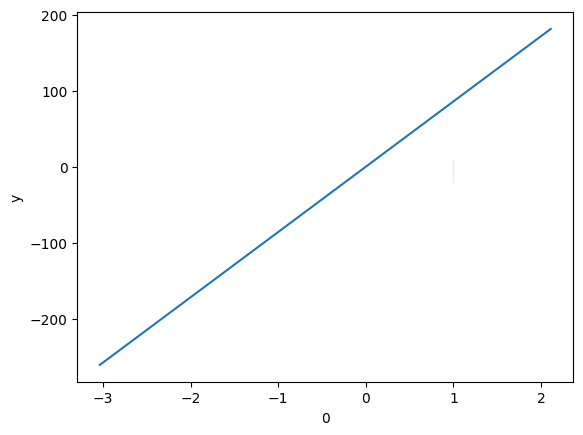

In [30]:
sns.lineplot(data=df, x=0, y='y')
sns.lineplot(data=df, x=1, y='y')

In [31]:
l = LinearRegression().fit(X, y)
print(l.coef_)
print(l.intercept_)

[86.03919723]
1.7763568394002505e-15


In [32]:
def reg_linear(x, y):
    a = numpyro.sample("a", numpyro.distributions.Normal(0, 1))
    mu = jax.numpy.dot(a, x)
    numpyro.sample("dist", numpyro.distributions.Normal(mu, 1.), obs=y)

In [33]:
sampler = numpyro.infer.SVI(
    reg_linear,
    lambda x, y: None,
    optim=numpyro.optim.Minimize(),
    loss=numpyro.infer.Trace_ELBO(),
    x=jax.numpy.array(df[0].values),
    y=jax.numpy.array(df['y'].values))

In [34]:
svi_result = sampler.run(jax.random.PRNGKey(0), 25)

  0%|          | 0/25 [00:00<?, ?it/s]/home/blue_helmet/projects/uerj/uerj/lib/python3.10/site-packages/jax/_src/scipy/optimize/minimize.py:102: UserWarning: Found vars in model but not guide: {'a', 'b'}
  fun_with_args = lambda x: fun(x, *args)
  0%|          | 0/25 [00:00<?, ?it/s]


ValueError: zero-size array to reduction operation max which has no identity

In [9]:
svi_result.params

{'a': Array(-0.01911047, dtype=float32), 'b': Array(82.45629, dtype=float32)}